In [9]:
!pip install streamlit numpy pandas scipy plotly

In [3]:
LS = float(input("enter the minimimum stock price value that will appear on the heat map: "))
HS = float(input("enter the maximum stock price value that will appear on the heat map: "))
LV = float(input("enter the minimimum volatility value that will appear on the heat map: "))
HV = float(input("enter the maximum volatility value that will appear on the heat map: "))



if LS >= HS:
    print("minimum stock price must be higher than maximum stock price")
    LS = float(input("enter the minimimum stock price value that will appear on the heat map: "))
    HS = float(input("enter the maximum stock price value that will appear on the heat map: "))
    LV = float(input("enter the minimimum volatility value that will appear on the heat map: "))
    HV = float(input("enter the maximum volatility value that will appear on the heat map: "))
elif LV >= HV:
    print("minimum volatility price must be higher than maximum stock price")
    LS = float(input("enter the minimimum stock price value that will appear on the heat map: "))
    HS = float(input("enter the maximum stock price value that will appear on the heat map: "))
    LV = float(input("enter the minimimum volatility value that will appear on the heat map: "))
    HV = float(input("enter the maximum volatility value that will appear on the heat map: "))
else:
    print("all inputs are valid")

enter the minimimum stock price value that will appear on the heat map:  1
enter the maximum stock price value that will appear on the heat map:  4
enter the minimimum volatility value that will appear on the heat map:  1
enter the maximum volatility value that will appear on the heat map:  4


all inputs are valid


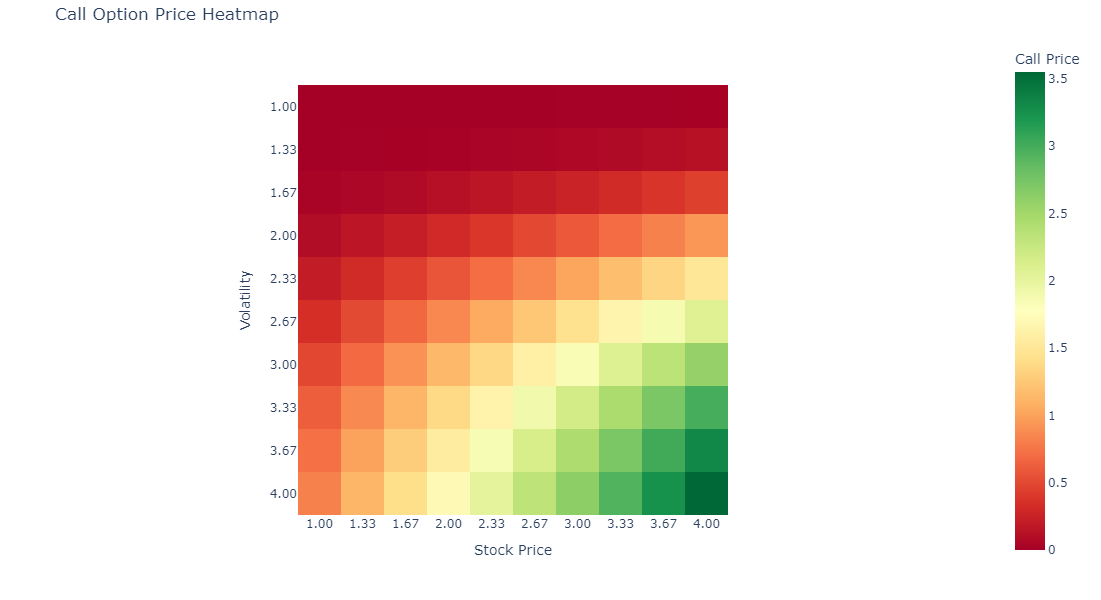

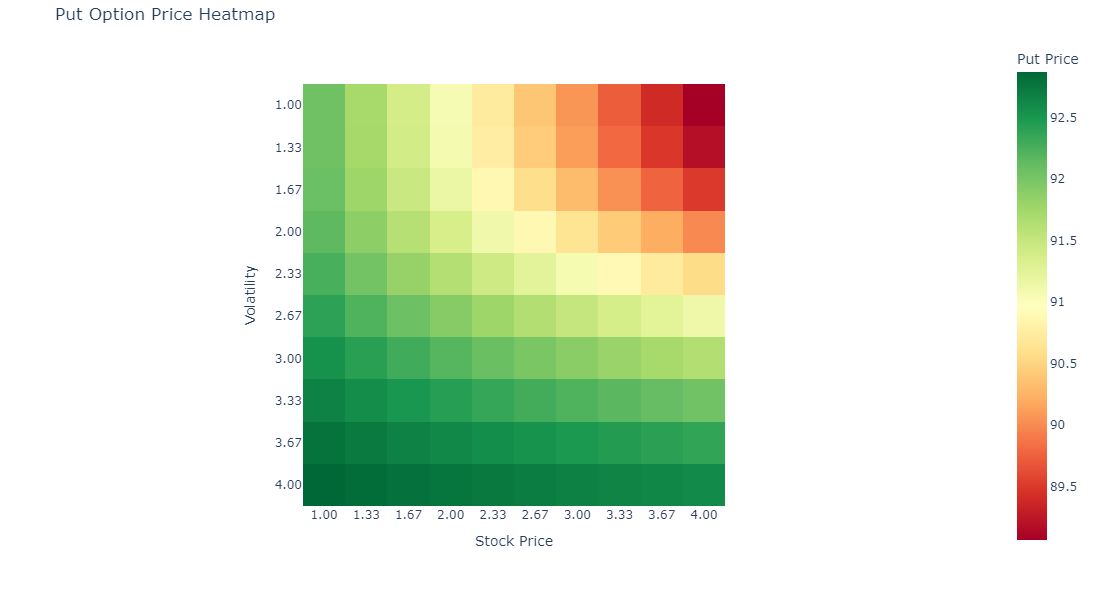

In [11]:
import numpy as np
import pandas as pd
import scipy.stats as si
import plotly.express as px

# Black-Scholes formula
def black_scholes(S, K, T, r, sigma, option_type='call'):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    
    if option_type == 'call':
        price = (S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0))
    elif option_type == 'put':
        price = (K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0) - S * si.norm.cdf(-d1, 0.0, 1.0))
    
    return price

# Create a 10x10 grid for stock prices and volatilities
stock_prices = np.linspace(LS, HS, 10)
volatilities = np.linspace(LV, HV, 10)

call_prices = np.zeros((10, 10))
put_prices = np.zeros((10, 10))

K = 100  # Strike price
T = 1.2    # Time to maturity
r = 0.06 # Risk-free rate

# Calculate the call and put prices
for i, S in enumerate(stock_prices):
    for j, sigma in enumerate(volatilities):
        call_prices[j, i] = black_scholes(S, K, T, r, sigma, option_type='call')
        put_prices[j, i] = black_scholes(S, K, T, r, sigma, option_type='put')


call_df = pd.DataFrame(call_prices, index=[f'{v:.2f}' for v in volatilities], columns=[f'{s:.2f}' for s in stock_prices])
put_df = pd.DataFrame(put_prices, index=[f'{v:.2f}' for v in volatilities], columns=[f'{s:.2f}' for s in stock_prices])

# Create heatmaps
fig_call = px.imshow(call_df, 
                     labels=dict(x="Stock Price", y="Volatility", color="Call Price"), 
                     color_continuous_scale="RdYlGn")
fig_call.update_layout(
    title="Call Option Price Heatmap",
    width=600,  # Adjust width as needed
    height=600,  # Adjust height as needed
    margin=dict(l=40, r=40, b=40, t=40)
)
fig_call.update_yaxes(scaleanchor="x", scaleratio=1)

fig_put = px.imshow(put_df, 
                    labels=dict(x="Stock Price", y="Volatility", color="Put Price"), 
                    color_continuous_scale="RdYlGn")
fig_put.update_layout(
    title="Put Option Price Heatmap",
    width=590,  # you can adjust width
    height=590,  # you can adjust height
    margin=dict(l=40, r=40, b=40, t=40)
)
fig_put.update_yaxes(scaleanchor="x", scaleratio=1)

# Display the heatmaps
fig_call.show()
fig_put.show()